In [399]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [400]:
allfiles = [f for f in os.listdir('.') if os.path.isfile(f)] 
allfiles.remove('Plotter.ipynb')
allfiles

['200_dec_nz.csv',
 '200_dec_z.csv',
 '200_inc_nz.csv',
 '200_inc_z.csv',
 '200_rand_nz.csv',
 '200_rand_z.csv',
 'df_200_dec_nz_CS.png',
 'df_200_dec_nz_TAT.png',
 'df_200_dec_nz_WT.png',
 'df_200_dec_z_CS.png',
 'df_200_dec_z_TAT.png',
 'df_200_dec_z_WT.png',
 'df_200_inc_nz_CS.png',
 'df_200_inc_nz_TAT.png',
 'df_200_inc_nz_WT.png',
 'df_200_inc_z_CS.png',
 'df_200_inc_z_TAT.png',
 'df_200_inc_z_WT.png',
 'df_200_rand_nz_CS.png',
 'df_200_rand_nz_TAT.png',
 'df_200_rand_nz_WT.png',
 'df_200_rand_z_CS.png',
 'df_200_rand_z_TAT.png',
 'df_200_rand_z_WT.png']

In [402]:
#csv files
files=[]
for file in allfiles:
    if file.split('.')[1]=='csv':
        files.append(file)
files
        

['200_dec_nz.csv',
 '200_dec_z.csv',
 '200_inc_nz.csv',
 '200_inc_z.csv',
 '200_rand_nz.csv',
 '200_rand_z.csv']

In [403]:
#preparing df names
df_names=[]
for file in files:
    df_names.append('df_'+file.split('.')[0])
df_names

['df_200_dec_nz',
 'df_200_dec_z',
 'df_200_inc_nz',
 'df_200_inc_z',
 'df_200_rand_nz',
 'df_200_rand_z']

In [404]:
dfs={}
for i in range(len(files)):
    dfs[df_names[i]]=pd.read_csv(files[i])


In [405]:
for df in dfs:
    print(df)
    print(dfs.get(df).head())

df_200_dec_nz
   dqrr_avg_turnaround_time  dqrr_avg_wait_time  dqrr_context_switches  \
0                  4.000000                 0.0                      0   
1                  4.500000                 0.0                      0   
2                  5.333333                 0.0                      0   
3                  6.750000                 0.0                      0   
4                  8.200000                 0.0                      0   

   hrrn_avg_turnaround_time  hrrn_avg_wait_time  hrrn_context_switches  \
0                  4.000000                 0.0                      0   
1                  6.500000                 2.0                      1   
2                 11.333333                 6.0                      2   
3                 19.750000                13.0                      4   
4                 26.000000                17.8                      4   

   no_of_processes  
0                1  
1                2  
2                3  
3           

In [406]:
TATcols=['dqrr_avg_turnaround_time', 'hrrn_avg_turnaround_time','no_of_processes']
WTcols=['dqrr_avg_wait_time', 'hrrn_avg_wait_time','no_of_processes']
CScols=['dqrr_context_switches', 'hrrn_context_switches','no_of_processes']


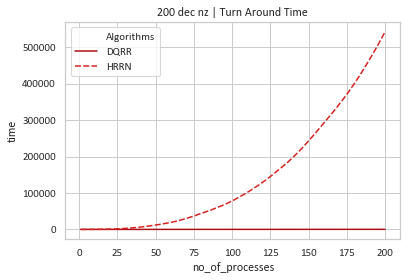

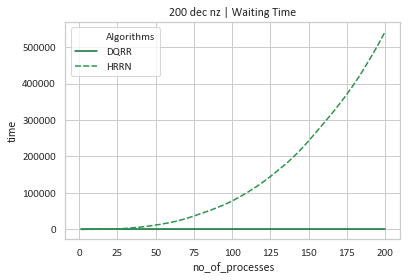

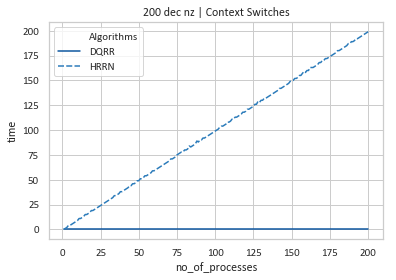

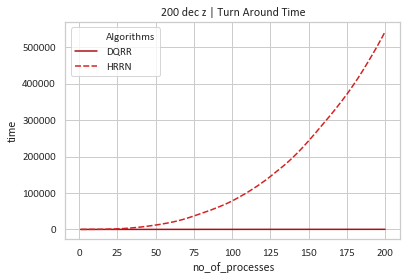

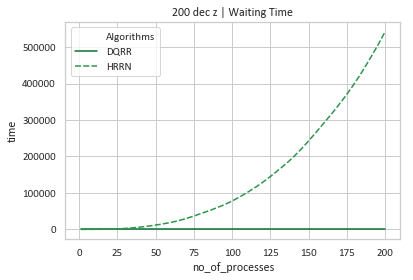

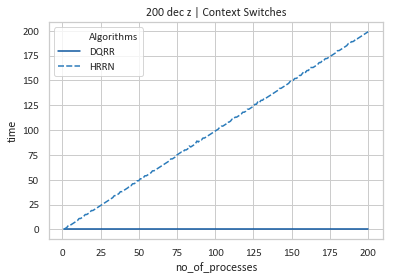

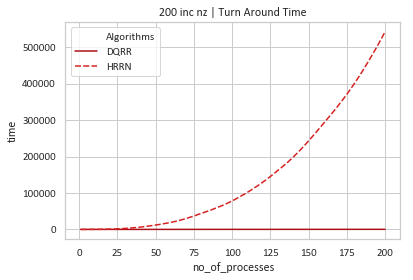

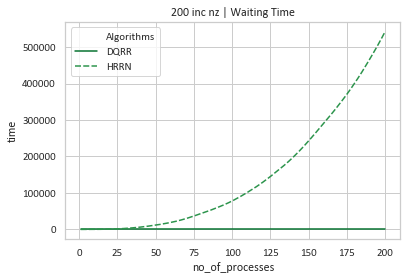

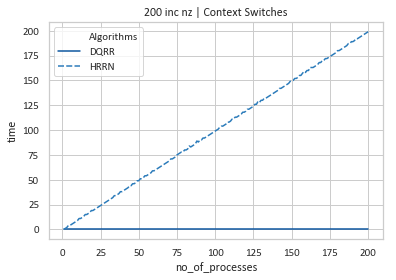

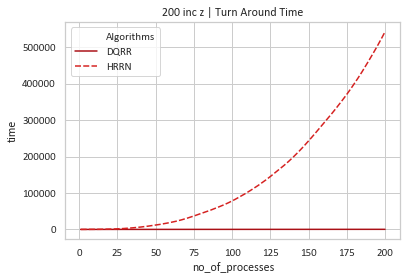

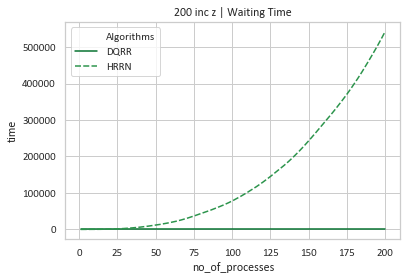

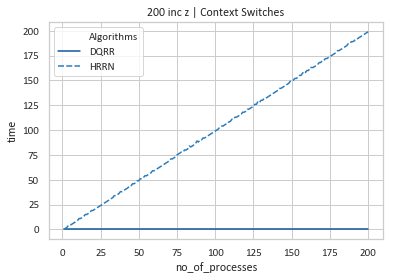

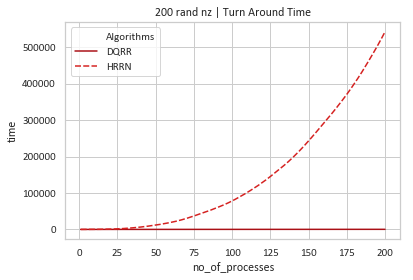

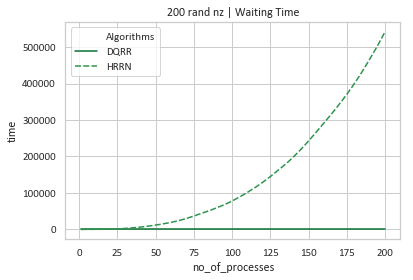

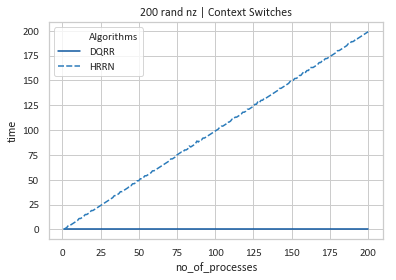

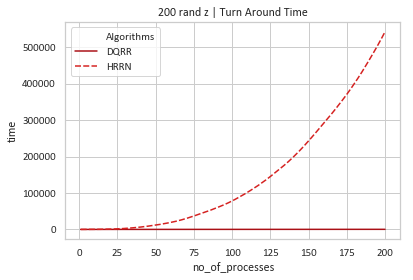

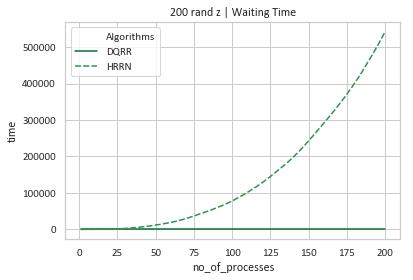

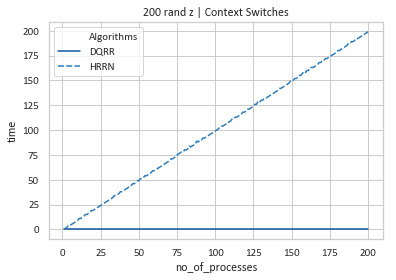

In [414]:
for df_key in dfs:
    df=dfs.get(df_key)
    cols=df.columns
    
    df_TAT=pd.DataFrame(df[TATcols])
    df_WT=pd.DataFrame(df[WTcols])
    df_CS=pd.DataFrame(df[CScols])
    
    df_TAT.rename(columns={'dqrr_avg_turnaround_time':'DQRR', 'hrrn_avg_turnaround_time':'HRRN'}, inplace=True)
    df_WT.rename(columns={'dqrr_avg_wait_time':'DQRR', 'hrrn_avg_wait_time':'HRRN'}, inplace=True)
    df_CS.rename(columns={'dqrr_context_switches':'DQRR', 'hrrn_context_switches':'HRRN'}, inplace=True)
    
    
    df_TAT_melted=pd.melt(df_TAT, id_vars='no_of_processes', value_name='time',var_name='Algorithms')
    df_WT_melted=pd.melt(df_WT, id_vars='no_of_processes', value_name='time',var_name='Algorithms')
    df_CS_melted=pd.melt(df_CS, id_vars='no_of_processes', value_name='time',var_name='Algorithms')
    
    
    #TAT
    plt.figure()
    sns.set(style='whitegrid', font='Calibri',palette='Reds_r')
    TATplot=sns.lineplot(x='no_of_processes',y='time', hue='Algorithms', style='Algorithms', data=df_TAT_melted)
    
    
    TATtitle=df_key.split('_')
    TATtitle.remove('df')
    TATtitle.append('| Turn Around Time')
    TATtitle=' '.join(TATtitle)
    TATplot.set_title(TATtitle)
    
    TATfig=TATplot.get_figure()
    TATname=df_key+'_TAT.png'
    TATfig.savefig(TATname)
    
    #WT
    plt.figure()
    sns.set(style='whitegrid', font='Calibri',palette='Greens_r')
    WTplot=sns.lineplot(x='no_of_processes',y='time', hue='Algorithms', style='Algorithms', data=df_WT_melted)
    
    WTtitle=df_key.split('_')
    WTtitle.remove('df')
    WTtitle.append('| Waiting Time')
    WTtitle=' '.join(WTtitle)
    WTplot.set_title(WTtitle)
    
    WTfig=WTplot.get_figure()
    WTname=df_key+'_WT.png'
    WTfig.savefig(WTname)
    
    #CS
    plt.figure()
    sns.set(style='whitegrid', font='Calibri',palette='Blues_r')
    CSplot=sns.lineplot(x='no_of_processes',y='time', hue='Algorithms', style='Algorithms', data=df_CS_melted)
    
    CStitle=df_key.split('_')
    CStitle.remove('df')
    CStitle.append('| Context Switches')
    CStitle=' '.join(CStitle)
    CSplot.set_title(CStitle)
    
    CSfig=CSplot.get_figure()
    CSname=df_key+'_CS.png'
    CSfig.savefig(CSname)
    
    
    
    
    
    

## Testing Below
Ignore.

In [415]:
meltable=dfs.get(df_names[0])[TATcols]
melt0=pd.melt(meltable, id_vars='no_of_processes', value_name='time',var_name='Algorithms')
melt0.head()


,no_of_processes,Algorithms,time
0,1,dqrr_avg_turnaround_time,4.000000
1,2,dqrr_avg_turnaround_time,4.500000
2,3,dqrr_avg_turnaround_time,5.333333
3,4,dqrr_avg_turnaround_time,6.750000
4,5,dqrr_avg_turnaround_time,8.200000


In [416]:
#g = sns.FacetGrid(melt0,col='no_of_processes',hue='variable')

#dfs.get(df_names[1]).plot('no_of_processes',['avg_wait_time','avg_turnaround_time'])



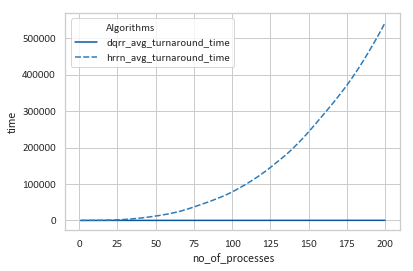

In [417]:
sns.set(style='whitegrid', palette='Blues_r', font='Calibri')
sns_plot=sns.lineplot(x='no_of_processes',y='time', hue='Algorithms', style='Algorithms', data=melt0)

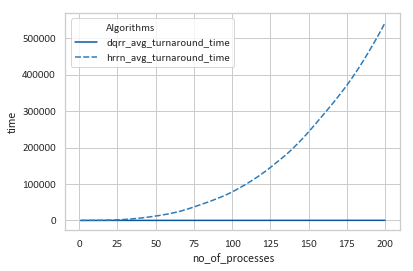

In [418]:
sns_fig=sns.lineplot(x='no_of_processes',y='time', hue='Algorithms', style='Algorithms', data=melt0).get_figure()
#sns_fig.savefig('testing.png')